The intial specta showed a distict differene in emission lines in the fo2=2 and fo2=-2 cases for each compostion at wavelengths>10um so ive invesgtiated here.


In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
#%matplotlib notebook # use this for interactive plots

In [2]:

#################################### FUNCTIONS ####################################
#Function to read data and plot
def read_and_plot(ax,
                  path,
                  label="",
                  width=1,
                  style="-",
                  color="blue",
                  alpha=0.6,
                  rebin=0
                  ):
    """A plotting function taken from helios to read and plot the spectral data
    Inputs:
        ax = axis which the data is plotted on
        path = the directory file path of the flux data files
        label = the name you wish to attach to the plot on the legend
        width = width of the lines in the plot
        style = linestyle used in the plot
        color = color of the lines
        alpha = transparency of the color of the lines
        rebin = Resolution which the spectrum is rebinned to"""
    if 'flux_ratio' in path: #Serach for data file flux ratio in directory
        data = np.loadtxt(path)
        lamda, spec = data[:,0], data[:,1]*1e6#*((1*6371000)/(0.681*696000000))**2 #Here we multiple the flux by (Rp/Rstar)^2  as this the flux we measure  
    else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')

    if rebin > 0:
        lamda, spec = tls.rebin_spectrum_to_resolution(lamda, spec, resolution=rebin, w_unit='micron')

    line, = ax.plot(lamda, spec, color=color,linewidth=width, linestyle=style, label=label, alpha=alpha)

    return line




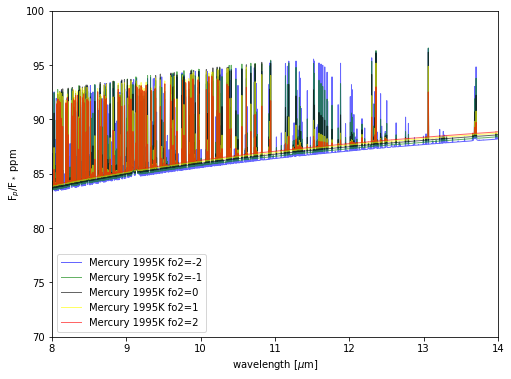

In [3]:
fig, ax = plt.subplots(figsize=(8,6)) #Create figure
#Plot the mercury compostion for each fo2 value
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='blue')
read_and_plot(ax, "Mercury_1995_fo2_-1_flux_ratio.dat",label='Mercury 1995K fo2=-1',color='green')
read_and_plot(ax, "Mercury_1995_fo2_0_flux_ratio.dat",label='Mercury 1995K fo2=0',color='black')
read_and_plot(ax, "Mercury_1995_fo2_1_flux_ratio.dat",label='Mercury 1995K fo2=1',color='yellow')
read_and_plot(ax, "Mercury_1995_fo2_2_flux_ratio.dat",label='Mercury 1995K fo2=2',color='red')

#Customise the axis and create legend
ax.set(xlim=[8, 14], xlabel='wavelength [$\mu$m]', ylabel='F$_p$/F$_*$ ppm')
ax.set_ylim(70,100)
ax.legend(loc='best', frameon=True)
#Save figure
plt.savefig("Mecury spectrum for fo2=pm2 arounf 10um.png")

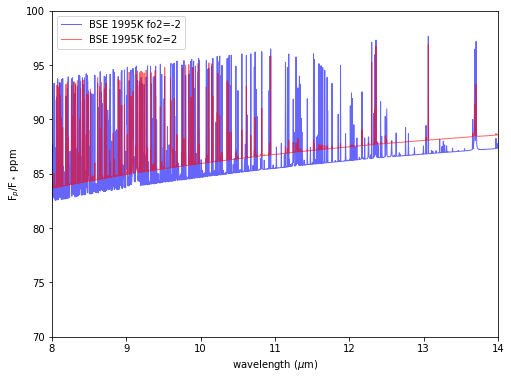

In [4]:
fig, ax = plt.subplots(figsize=(8,6)) #Create figure
#Plot the spectrum for the most and least oxisdied states
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue')
read_and_plot(ax, "BSE_1995_fo2_2_flux_ratio.dat",label='BSE 1995K fo2=2',color='red')
#Customise axis and create a legend
ax.set(xlim=[8, 14], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_ylim(70,100)
ax.legend(loc='best', frameon=True)
#Save the figure
plt.savefig("BSE spectrum for fo2=pm2 arounf 10um.png")

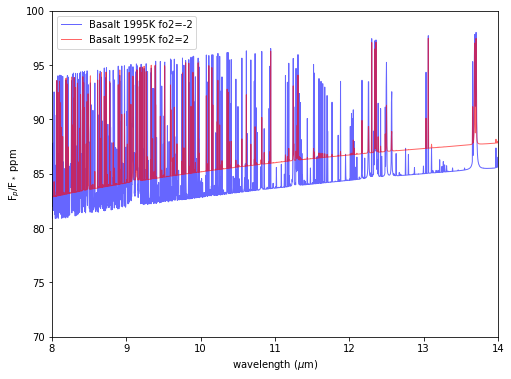

In [5]:
fig, ax = plt.subplots(figsize=(8,6)) #Create the figure
#Plot the most and least oxised cases for the Basalt spectrum
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue')
read_and_plot(ax, "Basalt_1995_fo2_2_flux_ratio.dat",label='Basalt 1995K fo2=2',color='red')
#Customise axis and create legend
ax.set(xlim=[8, 14], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_ylim(70,100)
ax.legend(loc='best', frameon=True)
#Save figure
plt.savefig("Basalt spectrum for fo2=pm2 arounf 10um.png")

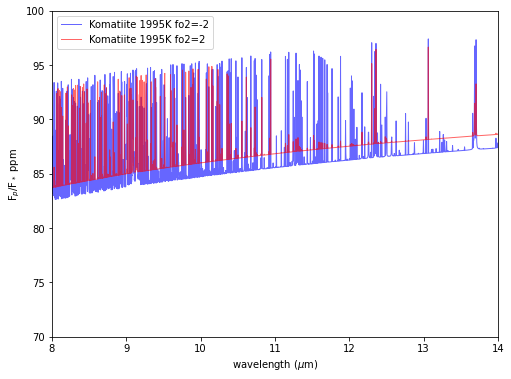

In [6]:
fig, ax = plt.subplots(figsize=(8,6)) #Create figure
#Plot the most and least oxised case for the Komatiite spectrum
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax, "komatiite_1995_fo2_2_flux_ratio.dat",label='Komatiite 1995K fo2=2',color='red')
#Customise the axis and create legend
ax.set(xlim=[8, 14], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_ylim(70,100)
ax.legend(loc='best', frameon=True)
#Save figure
plt.savefig("komatiite spectrum for fo2=pm2 arounf 10um.png")

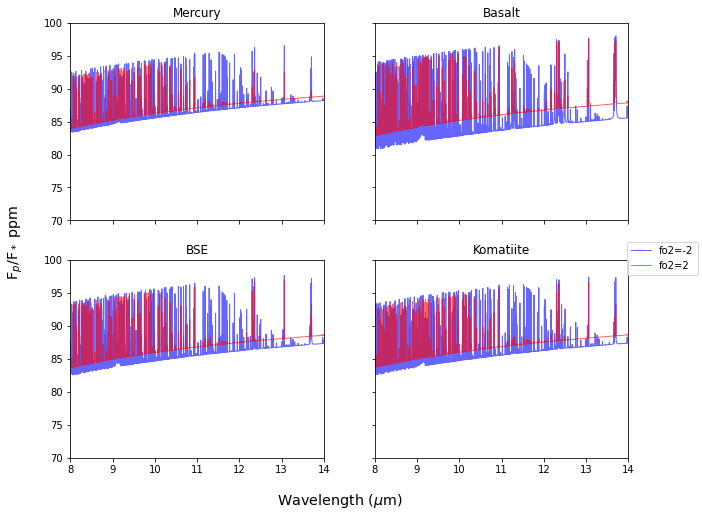

In [9]:
#Plot grid of figures for the most and least oxisied case for each spectrum
fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(10,8),sharex=True,sharey=True) #Create figures
ax=axes[0,0] #Set axis and plot Mecury
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='fo2=-2',color='blue')
read_and_plot(ax, "Mercury_1995_fo2_2_flux_ratio.dat",label='fo2=2',color='red')
ax.set_title('Mercury')
ax.set(xlim=[8, 14])
ax.set_ylim(70,100)
fig.legend(loc='center right', frameon=True)
#Set axis and plot BSE
ax1=axes[1,0]
read_and_plot(ax1, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue')
read_and_plot(ax1, "BSE_1995_fo2_2_flux_ratio.dat",label='BSE 1995K fo2=2',color='red')
ax1.set_title('BSE')
ax1.set(xlim=[8, 14])
ax1.set_ylim(70,100)
ax2=axes[0,1]
read_and_plot(ax2, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue')
read_and_plot(ax2, "Basalt_1995_fo2_2_flux_ratio.dat",label='Basalt 1995K fo2=2',color='red')
ax2.set_title('Basalt')

ax2.set(xlim=[8, 14])
ax2.set_ylim(70,100)
ax3=axes[1,1]
read_and_plot(ax3, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax3, "Komatiite_1995_fo2_2_flux_ratio.dat",label='Komatiite 1995K fo2=2',color='red')
ax3.set_title('Komatiite')

ax3.set(xlim=[8, 14])
ax3.set_ylim(70,100)
fig.text(0.5,0.05,'Wavelength ($\mu$m)', va='center', ha='center',fontsize='x-large')
fig.text(0.05,0.5,'F$_p$/F$_*$ ppm', rotation='vertical',va='center', ha='center',fontsize='x-large')
plt.savefig("Spectrums for fo2=pm2 around 10um.png")
